In [20]:
##### Load packages #####
library(tidyverse)
library(multcomp)
library(ggplot2)
# Load CSV
widecsv <- read.csv("fig.3f.csv")

#rotate from wide table to tall table
tallcsv <- stack(widecsv)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
for(i in 1:nrow(tallcsv))
  if(i%%3 == 2){
    tallcsv[i,3] <- "Two"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%3 == 0){
    tallcsv[i,3] <- "Three"
  } 
tallcsv
#export
write.csv(tallcsv,"fig.3f_tall.csv", row.names = FALSE)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'ED Fig.11a.csv'”


VALUE,Treatment,Trial
<dbl>,<fct>,<chr>
0.015517,X01.DMSO,One
0.041801,X01.DMSO,Two
0.048875,X01.DMSO,Three
1.104564,X02.flg22,One
0.485194,X02.flg22,Two
1.410242,X02.flg22,Three
0.539364,X03.Maya_1_1,One
0.906898,X03.Maya_1_1,Two
1.824776,X03.Maya_1_1,Three


In [21]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [22]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("fig.3f_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))
print(head(VALUEdata))

     VALUE Treatment Trial
1 0.015517  X01.DMSO   One
2 0.041801  X01.DMSO   Two
3 0.048875  X01.DMSO Three
4 1.104564 X02.flg22   One
5 0.485194 X02.flg22   Two
6 1.410242 X02.flg22 Three


[1] 1 2

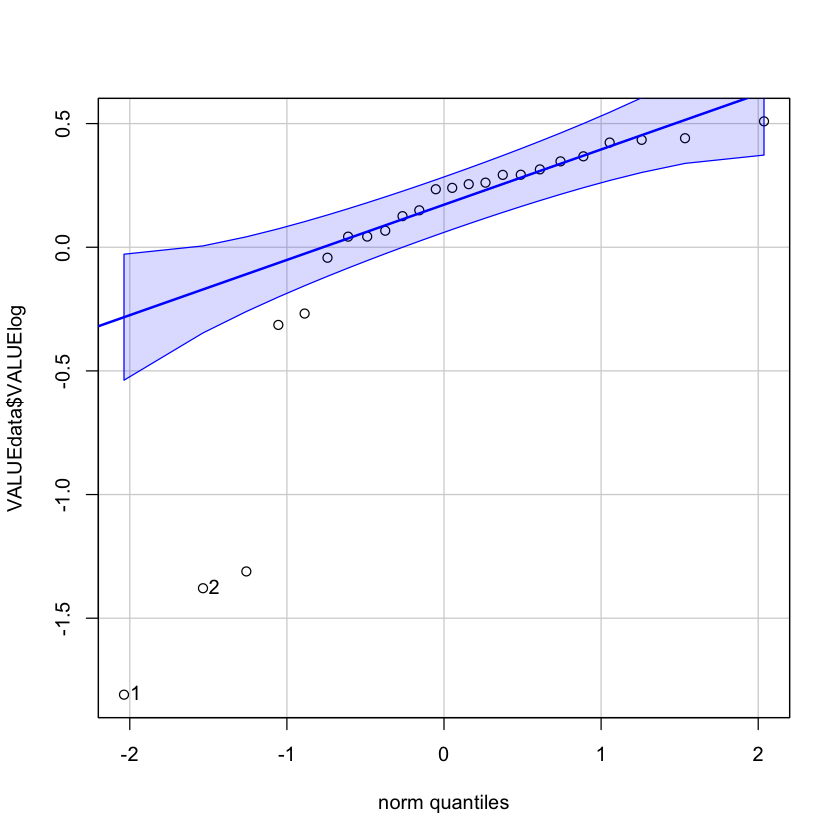

In [23]:
#Normal distribution and log converted
VALUEdata$VALUElog <- log10(VALUEdata$VALUE)
qqp(VALUEdata$VALUElog, "norm")

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


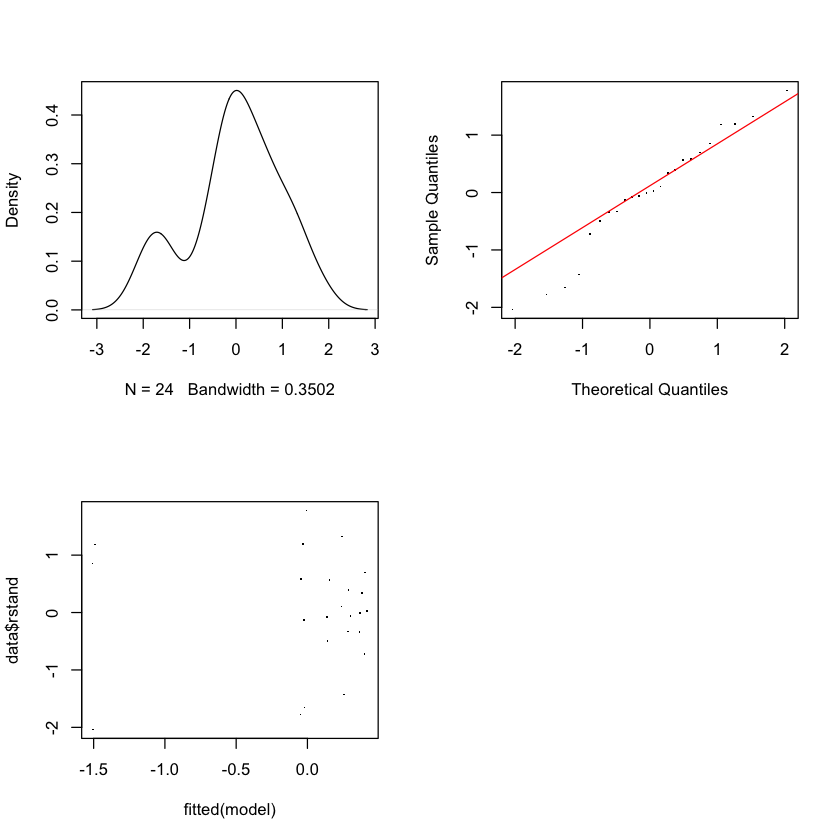

In [24]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUElog.lmm<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUElog.lmm)

In [18]:
#If the above looks good, then we can get the model characteristics
summary(VALUElog.lmm)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUElog ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
    -3.1      8.7     11.6    -23.1       14 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.06544 -0.37822  0.01045  0.61867  1.80061 

Random effects:
 Groups   Name        Variance  Std.Dev.
 Trial    (Intercept) 0.0004464 0.02113 
 Residual             0.0219355 0.14811 
Number of obs: 24, groups:  Trial, 3

Fixed effects:
                    Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)         -1.49964    0.08638 23.93334  -17.36 4.58e-15 ***
TreatmentMaya_1_1    1.48319    0.12093 21.00000   12.27 4.86e-11 ***
TreatmentMaya_1_10   1.64387    0.12093 21.00000   13.59 7.07e-12 ***
TreatmentMaya_1_100  1.79129    0.12093 21.00000   14.81 1.37e-12 ***
TreatmentMaya_2_1    1.74585    0.12093 21.00000   14.44 2.24e-12 ***
TreatmentMaya_2_1

In [25]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result)
print(multcomps)
print(summary(tukey_result))

     Sum Sq         Mean Sq          NumDF       DenDF       F value     
 Min.   :8.165   Min.   :1.166   Min.   :7   Min.   :21   Min.   :53.17  
 1st Qu.:8.165   1st Qu.:1.166   1st Qu.:7   1st Qu.:21   1st Qu.:53.17  
 Median :8.165   Median :1.166   Median :7   Median :21   Median :53.17  
 Mean   :8.165   Mean   :1.166   Mean   :7   Mean   :21   Mean   :53.17  
 3rd Qu.:8.165   3rd Qu.:1.166   3rd Qu.:7   3rd Qu.:21   3rd Qu.:53.17  
 Max.   :8.165   Max.   :1.166   Max.   :7   Max.   :21   Max.   :53.17  
     Pr(>F)         
 Min.   :6.063e-12  
 1st Qu.:6.063e-12  
 Median :6.063e-12  
 Mean   :6.063e-12  
 3rd Qu.:6.063e-12  
 Max.   :6.063e-12  


Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”


      X01.DMSO      X02.flg22   X03.Maya_1_1  X04.Maya_1_10 X05.Maya_1_100 
           "a"            "b"            "b"           "bc"           "bc" 
  X06.Maya_2_1  X07.Maya_2_10 X08.Maya_2_100 
          "bc"            "c"            "c" 


Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”
Warning message in RET$pfunction("adjusted", ...):
“Completion with error > abseps”



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lmer(formula = VALUElog ~ Treatment + (1 | Trial), data = VALUEdata, 
    REML = FALSE)

Linear Hypotheses:
                                     Estimate Std. Error z value Pr(>|z|)    
X02.flg22 - X01.DMSO == 0             1.45911    0.12093  12.066  < 0.001 ***
X03.Maya_1_1 - X01.DMSO == 0          1.48319    0.12093  12.265  < 0.001 ***
X04.Maya_1_10 - X01.DMSO == 0         1.64387    0.12093  13.594  < 0.001 ***
X05.Maya_1_100 - X01.DMSO == 0        1.79129    0.12093  14.813  < 0.001 ***
X06.Maya_2_1 - X01.DMSO == 0          1.74585    0.12093  14.437  < 0.001 ***
X07.Maya_2_10 - X01.DMSO == 0         1.87188    0.12093  15.479  < 0.001 ***
X08.Maya_2_100 - X01.DMSO == 0        1.90800    0.12093  15.778  < 0.001 ***
X03.Maya_1_1 - X02.flg22 == 0         0.02408    0.12093   0.199  1.00000    
X04.Maya_1_10 - X02.flg22 == 0        0.18476    0.12093   1.528  0.79264    
X05.M